# Proyecto final: "Professional Data Science DEVF"

# Análisis exploratorio del top 50 Gobal más escuchado de Spotify
## ¿Qué tienen de especial las canciones más escuchado en el mundo en Spotify?
-----------------------------------------------
#### *Por: Julio César Avila Torreblanca*

#### Resumen:
En este trabajo se realiza una conexión a la API de Spotify para obtener información sobre las canciones contenidas en una playlist (top 50 más escuchadas). Depués de ello se analiza la información extraida para realizar un estudio estadístico y obtener insights.

## Parte 1: Conexión a la API de Spotify y extracción de los datos.

La librería que usaremos para conectarnos a la API es *spotipy*.

In [1]:
!pip install spotipy

"pip" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


Importamos las librerías que necesitaremos a lo largo del proyecto.

In [2]:
# Conextion to the Spotify's API
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Secrets Keys to stablish conection 
%store -r clientID
%store -r clientSecretID

# Data transformation and visualization
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

import seaborn as sns

pd.options.mode.chained_assignment = None

import datetime

pd.set_option('display.max_columns', None)

Lo primero a realizar es obtener la informaición de la API de Spotify, para ello creamos la siguiente función la cual se conecta a la API y extrae la información solicitada. Los únicos parámetros a ser ingresados son las llaves para realizar la conexión y el link de la playlist que se quiera analizar.

In [3]:
def extractDataTracks(playlist_link, clientID, clientSecretID):
    """"This function connects to the Spotify API and extracts data
    about songs in a playlist. 

    Args:
        playlist_link (string): it's the link of the playlist. The playlist
            must contains all the songs that will be analysed.
        clientID (string): credendial requiared to connecto to the API.
        clienSecretID (string): secret credendial requiared to connecto to the 
        API.
    
    Returns: list of dictionaries. Each dictionary is a register.
    """
    # Authentication - without user
    client_credentials_manager = SpotifyClientCredentials(
        client_id=clientID, client_secret=clientSecretID)

    sp = spotipy.Spotify(
        client_credentials_manager = client_credentials_manager)

    # Extrackting URI's Tracks From a Playlist. 
    playlist_URI = playlist_link.split("/")[-1].split("?")[0]
    
    track_uris = [ x["track"]["uri"] for x in sp.playlist_tracks(playlist_URI)["items"] ]
    l=[]
    
    for track in sp.playlist_tracks(playlist_URI)["items"]:
        track_uri = track["track"]["uri"]
        dict1 = {
            'id_track': track['track']['id'],
            'popularity_track': track["track"]["popularity"],
            'name_track': track["track"]["name"],
            'release_date': track['track']['album']['release_date'],
            'album': track["track"]["album"]["name"],
            'id_artist': track['track']['artists'][0]['id'],
            'name_artist': track["track"]["artists"][0]["name"]   
            #'genre': sp.artist(track["artists"][0]["external_urls"]["spotify"]['genres'])
        }
        dict2 = sp.audio_features(track_uri)[0]
        dict3 = sp.artist(track['track']['artists'][0]['id'])
        dict1 = dict1 | dict2 | dict3
        l.append(dict1)

    return l

Ya que se tiene una función que permite conectarse a la API y extraer la información, la probamos con la playlist que queremos analizar: *Top 50 Glogabl*. Esta información la transformamos en un dataframe para reaizar el análisis.

In [4]:
# Data extraction
playlist_link_BillieEilish = 'https://open.spotify.com/playlist/37i9dQZF1DZ06evO4hswvr?si=3dead096f1734786'
playlist_link_Top50Mx = 'https://open.spotify.com/playlist/37i9dQZEVXbO3qyFxbkOE1?si=15e9481b4741495e'
playlist_link_Top50Global = 'https://open.spotify.com/playlist/37i9dQZEVXbMDoHDwVN2tF?si=1367122882d04888'
#vaguens = 'https://open.spotify.com/artist/0cE1FRPmspxRadK6z3zQb2?si=fe7ee670823640ad'
data = extractDataTracks(playlist_link_Top50Global , clientID, clientSecretID)

# Dataframe creation
df1 = pd.DataFrame(data) # First dataframe to work
df2 = pd.DataFrame(data) # Copy 
df1.head()

,id_track,popularity_track,name_track,release_date,album,id_artist,name_artist,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,external_urls,followers,genres,href,images,name,popularity
0,2tTmW7RDtMQtBk7m2rYeSw,100,"Quevedo: Bzrp Music Sessions, Vol. 52",2022-07-06,"Quevedo: Bzrp Music Sessions, Vol. 52",716NhGYqD1jl2wI1Qkgq36,Bizarrap,0.621,0.782,2,-5.548,1,0.0440,0.0125,0.033000,0.2300,0.550,128.033,artist,716NhGYqD1jl2wI1Qkgq36,spotify:artist:716NhGYqD1jl2wI1Qkgq36,https://api.spotify.com/v1/tracks/2tTmW7RDtMQt...,https://api.spotify.com/v1/audio-analysis/2tTm...,198938,4,{'spotify': 'https://open.spotify.com/artist/7...,"{'href': None, 'total': 6741290}","[argentine hip hop, pop venezolano, trap argen...",https://api.spotify.com/v1/artists/716NhGYqD1j...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Bizarrap,87
1,4Dvkj6JhhA12EX05fT7y2e,93,As It Was,2022-05-20,Harry's House,6KImCVD70vtIoJWnq6nGn3,Harry Styles,0.520,0.731,6,-5.338,0,0.0557,0.3420,0.001010,0.3110,0.662,173.930,artist,6KImCVD70vtIoJWnq6nGn3,spotify:artist:6KImCVD70vtIoJWnq6nGn3,https://api.spotify.com/v1/tracks/4Dvkj6JhhA12...,https://api.spotify.com/v1/audio-analysis/4Dvk...,167303,4,{'spotify': 'https://open.spotify.com/artist/6...,"{'href': None, 'total': 22991538}",[pop],https://api.spotify.com/v1/artists/6KImCVD70vt...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Harry Styles,91
2,6Sq7ltF9Qa7SNFBsV5Cogx,98,Me Porto Bonito,2022-05-06,Un Verano Sin Ti,4q3ewBCX7sLwd24euuV69X,Bad Bunny,0.911,0.712,1,-5.105,0,0.0817,0.0901,0.000027,0.0933,0.425,92.005,artist,4q3ewBCX7sLwd24euuV69X,spotify:artist:4q3ewBCX7sLwd24euuV69X,https://api.spotify.com/v1/tracks/6Sq7ltF9Qa7S...,https://api.spotify.com/v1/audio-analysis/6Sq7...,178567,4,{'spotify': 'https://open.spotify.com/artist/4...,"{'href': None, 'total': 54438374}","[latin, reggaeton, trap latino]",https://api.spotify.com/v1/artists/4q3ewBCX7sL...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Bad Bunny,100
3,1IHWl5LamUGEuP4ozKQSXZ,97,Tití Me Preguntó,2022-05-06,Un Verano Sin Ti,4q3ewBCX7sLwd24euuV69X,Bad Bunny,0.650,0.715,5,-5.198,0,0.2530,0.0993,0.000291,0.1260,0.187,106.672,artist,4q3ewBCX7sLwd24euuV69X,spotify:artist:4q3ewBCX7sLwd24euuV69X,https://api.spotify.com/v1/tracks/1IHWl5LamUGE...,https://api.spotify.com/v1/audio-analysis/1IHW...,243717,4,{'spotify': 'https://open.spotify.com/artist/4...,"{'href': None, 'total': 54438374}","[latin, reggaeton, trap latino]",https://api.spotify.com/v1/artists/4q3ewBCX7sL...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",Bad Bunny,100
4,0skYUMpS0AcbpjcGsAbRGj,91,Pink Venom,2022-08-19,Pink Venom,41MozSoPIsD1dJM0CLPjZF,BLACKPINK,0.798,0.697,0,-7.139,1,0.0891,0.0202,0.000000,0.2590,0.745,90.031,artist,41MozSoPIsD1dJM0CLPjZF,spotify:artist:41MozSoPIsD1dJM0CLPjZF,https://api.spotify.com/v1/tracks/0skYUMpS0Acb...,https://api.spotify.com/v1/audio-analysis/0skY...,186964,4,{'spotify': 'https://open.spotify.com/artist/4...,"{'href': None, 'total': 32089169}","[k-pop, k-pop girl group]",https://api.spotify.com/v1/artists/41MozSoPIsD...,"[{'height': 640, 'url': 'https://i.scdn.co/ima...",BLACKPINK,84


Veamos qué tipo de variables tenemos y más información sobre el dataframe.

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 32 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id_track          50 non-null     object 
 1   popularity_track  50 non-null     int64  
 2   name_track        50 non-null     object 
 3   release_date      50 non-null     object 
 4   album             50 non-null     object 
 5   id_artist         50 non-null     object 
 6   name_artist       50 non-null     object 
 7   danceability      50 non-null     float64
 8   energy            50 non-null     float64
 9   key               50 non-null     int64  
 10  loudness          50 non-null     float64
 11  mode              50 non-null     int64  
 12  speechiness       50 non-null     float64
 13  acousticness      50 non-null     float64
 14  instrumentalness  50 non-null     float64
 15  liveness          50 non-null     float64
 16  valence           50 non-null     float64
 17 

In [6]:
df1.shape

(50, 32)

In [7]:
df1.isnull().any()

id_track            False
popularity_track    False
name_track          False
release_date        False
album               False
id_artist           False
name_artist         False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
type                False
id                  False
uri                 False
track_href          False
analysis_url        False
duration_ms         False
time_signature      False
external_urls       False
followers           False
genres              False
href                False
images              False
name                False
popularity          False
dtype: bool

Vemos que tenemos en total 32 variables, algunas son cuantitativas y otras cualitativas. Además, el dataframe contiene 50 registros (50 canciones) y no se tienen datos vacios.

## Parte 2: Limpieza y ordenamiento de los datos

Las tareas que realizaremos en esta parte son:

- Renombrar las variables para un mejor manejo y entendimiento.
- Cambiar la variable que contiene fecha a tipo *DateTime*.
- Limpiar los valores de las variables: *followers* and *Popularity* (artist_popularity).
- Hacer una copia del dataframe tomando solo las columnas que nos serán útiles.

In [8]:
# Capitalize column's names
df1.columns = df1.columns.str.capitalize()
df1.columns

Index(['Id_track', 'Popularity_track', 'Name_track', 'Release_date', 'Album',
       'Id_artist', 'Name_artist', 'Danceability', 'Energy', 'Key', 'Loudness',
       'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Type', 'Id', 'Uri', 'Track_href', 'Analysis_url',
       'Duration_ms', 'Time_signature', 'External_urls', 'Followers', 'Genres',
       'Href', 'Images', 'Name', 'Popularity'],
      dtype='object')

In [9]:
# Rename some variables
df1.rename(columns = {'Popularity': 'Popularity_artist', 
                     'Followers': 'Followers_artist', 
                     'Genres': 'Genres_artist'}, inplace = True)
df1.columns

Index(['Id_track', 'Popularity_track', 'Name_track', 'Release_date', 'Album',
       'Id_artist', 'Name_artist', 'Danceability', 'Energy', 'Key', 'Loudness',
       'Mode', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness',
       'Valence', 'Tempo', 'Type', 'Id', 'Uri', 'Track_href', 'Analysis_url',
       'Duration_ms', 'Time_signature', 'External_urls', 'Followers_artist',
       'Genres_artist', 'Href', 'Images', 'Name', 'Popularity_artist'],
      dtype='object')

In [10]:
# Tansform Release_date into datetime
df1['Release_date'] = pd.to_datetime(df1['Release_date']).dt.date
df1['Release_date'].head()

0    2022-07-06
1    2022-05-20
2    2022-05-06
3    2022-05-06
4    2022-08-19
Name: Release_date, dtype: object

In [11]:
# Clean Followers_artist variable
for x in range(df1.shape[0]):
    df1['Followers_artist'][x] = df1['Followers_artist'][x]['total']
df1['Followers_artist'].head()

0     6741290
1    22991538
2    54438374
3    54438374
4    32089169
Name: Followers_artist, dtype: object

In [12]:
# Copy impoortant columns
important_columns = ['Name_track',
                    'Name_artist',
                    'Album',
                    'Release_date',
                    'Popularity_track',
                    'Genres_artist',
                    'Popularity_artist',
                     'Followers_artist',
                    'Danceability',
                    'Energy',
                    'Key',
                    'Loudness',
                    'Mode',
                    'Speechiness',
                    'Instrumentalness',
                    'Liveness',
                    'Valence',
                    'Tempo',
                    'Type',
                    'Duration_ms',
                    'Time_signature']
                    
    
df_imp = df1[important_columns].copy()
df_imp.head()

,Name_track,Name_artist,Album,Release_date,Popularity_track,Genres_artist,Popularity_artist,Followers_artist,Danceability,Energy,Key,Loudness,Mode,Speechiness,Instrumentalness,Liveness,Valence,Tempo,Type,Duration_ms,Time_signature
0,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap,"Quevedo: Bzrp Music Sessions, Vol. 52",2022-07-06,100,"[argentine hip hop, pop venezolano, trap argen...",87,6741290,0.621,0.782,2,-5.548,1,0.0440,0.033000,0.2300,0.550,128.033,artist,198938,4
1,As It Was,Harry Styles,Harry's House,2022-05-20,93,[pop],91,22991538,0.520,0.731,6,-5.338,0,0.0557,0.001010,0.3110,0.662,173.930,artist,167303,4
2,Me Porto Bonito,Bad Bunny,Un Verano Sin Ti,2022-05-06,98,"[latin, reggaeton, trap latino]",100,54438374,0.911,0.712,1,-5.105,0,0.0817,0.000027,0.0933,0.425,92.005,artist,178567,4
3,Tití Me Preguntó,Bad Bunny,Un Verano Sin Ti,2022-05-06,97,"[latin, reggaeton, trap latino]",100,54438374,0.650,0.715,5,-5.198,0,0.2530,0.000291,0.1260,0.187,106.672,artist,243717,4
4,Pink Venom,BLACKPINK,Pink Venom,2022-08-19,91,"[k-pop, k-pop girl group]",84,32089169,0.798,0.697,0,-7.139,1,0.0891,0.000000,0.2590,0.745,90.031,artist,186964,4


## Parte 3: Exploración de los datos

### Canciones más populares
Veamos las 10 canciones más populares y los artistas correspondientes. Para ello ordenaremos las canciones por *Popularity_track*.

In [13]:
sort_pop = df_imp.sort_values(by='Popularity_track', ascending=False).reset_index()
sort_pop = sort_pop.loc[:9, ['Name_track','Name_artist','Popularity_track']]
sort_pop

,Name_track,Name_artist,Popularity_track
0,"Quevedo: Bzrp Music Sessions, Vol. 52",Bizarrap,100
1,Me Porto Bonito,Bad Bunny,98
2,Tití Me Preguntó,Bad Bunny,97
3,Efecto,Bad Bunny,96
4,Ojitos Lindos,Bad Bunny,96
5,Glimpse of Us,Joji,96
6,DESPECHÁ,ROSALÍA,96
7,La Bachata,Manuel Turizo,95
8,Moscow Mule,Bad Bunny,95
9,Left and Right (Feat. Jung Kook of BTS),Charlie Puth,94


Se aprecia que la canción más popular corresponde al artista Bizarrap con popularidad de 100, además Bad Bunny contiene las siguientes 4 canciones más escuchadas.

### Artistas con más apariciones en el top 50
Veamos que artista contienen más canciones. 

In [14]:
# A group by and a filter are applied
top_artists = df_imp.groupby(['Name_artist'])['Name_artist'].count().reset_index(name='N_appearences')
top_artists = top_artists[top_artists['N_appearences'] > 1]


In [15]:
# Sorting the data
sorted_top_artists = top_artists.sort_values(by='N_appearences', ascending=True)


Text(0.5, 0, 'Number of appearences')

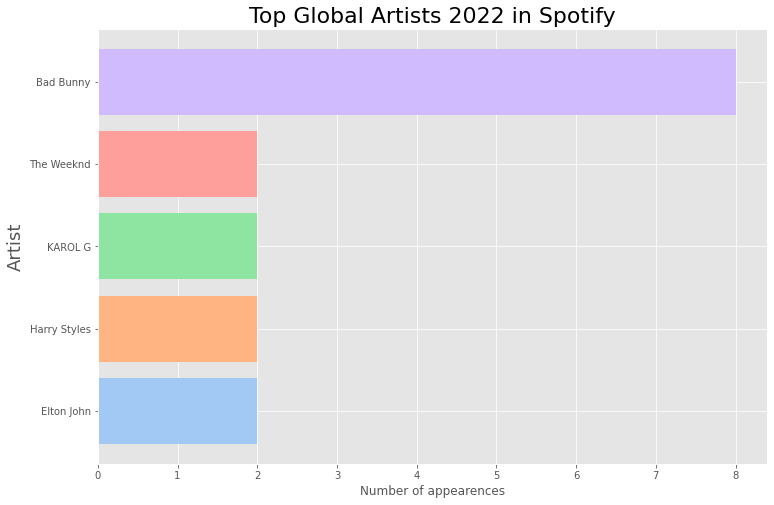

In [16]:
# Create a bar chart to visualize
plt.barh('Name_artist', 
         'N_appearences',
         data=sorted_top_artists,
         color=sns.color_palette('pastel'))
plt.title('Top Global Artists 2022 in Spotify', size=22)
plt.ylabel('Artist', size=18)
plt.xlabel('Number of appearences')

En este gráfico se muestran los artistas con más de una aparición en el top 50. Bad Bunny tiene 8 apariciones, mientras que The Weekmd, Karol G, Harry Styles y Elton John contienen dos apariciones.

### Géneros más escuchados 
Aquí crearemos un gráfico de pastel que contendrá los géneros del top 50.

In [17]:
# Clean the genres
for x in range(df_imp.shape[0]):
    try:
        df_imp['Genres_artist'][x] = df_imp['Genres_artist'][x][0]
    except:
        df_imp['Genres_artist'][x] = 'Unknown'
df_imp['Genres_artist']

0             argentine hip hop
1                           pop
2                         latin
3                         latin
4                         k-pop
5                r&b en espanol
6                 colombian pop
7                         latin
8                     dance pop
9                      big room
10                    dance pop
11                        latin
12                 afrofuturism
13                      art pop
14                    viral pop
15                    dance pop
16                        latin
17                    gauze pop
18                      Unknown
19                        latin
20                    dance pop
21      gen z singer-songwriter
22                    chill pop
23           australian hip hop
24                          pop
25                        latin
26             drill brasileiro
27                      dfw rap
28                    dance pop
29                      Unknown
30                    reggaeton
31      

In [21]:
# Group by the genres
top_genres = df_imp.groupby(['Genres_artist'])['Genres_artist'].count().reset_index(name='N_tracks')
top_genres = top_genres[top_genres['N_tracks'] > 1]

In [22]:
top_genres

,Genres_artist,N_tracks
0,Unknown,2
6,canadian contemporary r&b,2
10,colombian pop,2
11,dance pop,7
18,glam rock,2
21,latin,10
24,pop,2
26,r&b en espanol,2


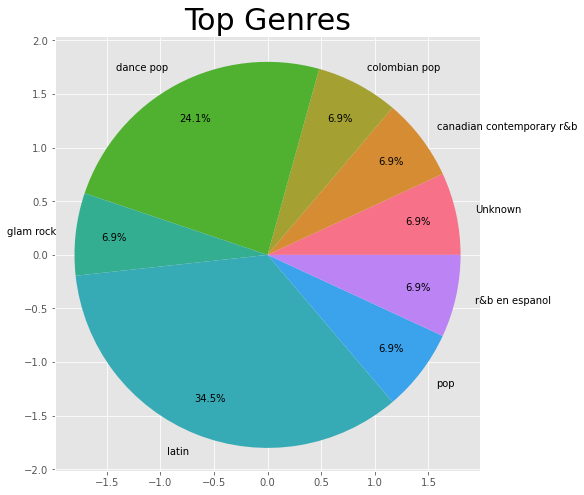

In [28]:
plt.pie(top_genres['N_tracks'], 
        labels=top_genres['Genres_artist'],
       colors=sns.color_palette("husl", 9),
       startangle=0,
       radius=1.8,
       frame=True,
       autopct='%1.1f%%',
       pctdistance=0.8)
plt.title('Top Genres', size=30)
plt.show()

Aquí estamos visualizando los géneros más escuchados en el top 50, donde hemos aplicado un filtro para los géneros que se repiten más de una vez. Se puede ver que el género *Latino* es el más escuchado con 34.5%. Después, *Dance pop* y *Glam rock* le siguen con 24.1% y 6.9%, correspondientemente. El resto de géneros contienen la misma cantidad, con 6.9%.